# Defining Descriptive Statistics for Numeric Data

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
import pandas as pd
import numpy as np

print('Your pandas version is: %s' % pd.__version__)
print('Your NumPy version is %s' % np.__version__)
from sklearn.datasets import load_iris
iris = load_iris()
iris_nparray = iris.data

iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype="category") 

Your pandas version is: 0.23.3
Your NumPy version is 1.14.5


## Measuring central tendency

In [4]:
print(iris_dataframe.mean(numeric_only=True))

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64


In [5]:
print(iris_dataframe.median(numeric_only=True))

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


## Measuring variance and range

In [6]:
print(iris_dataframe.std())

sepal length (cm)    0.828066
sepal width (cm)     0.433594
petal length (cm)    1.764420
petal width (cm)     0.763161
dtype: float64


In [7]:
print(iris_dataframe.max(numeric_only=True) 
      - iris_dataframe.min(numeric_only=True))

sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64


## Working with percentiles

In [8]:
print(iris_dataframe.quantile([0,.25,.50,.75,1]))

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.00                4.3               2.0               1.00               0.1
0.25                5.1               2.8               1.60               0.3
0.50                5.8               3.0               4.35               1.3
0.75                6.4               3.3               5.10               1.8
1.00                7.9               4.4               6.90               2.5


## Defining measures of normality

In [9]:
from scipy.stats import kurtosis, kurtosistest
variable = iris_dataframe['petal length (cm)']
k = kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f' 
      % (k, zscore, pvalue))

Kurtosis -1.395 z-score -14.811 p-value 0.000


In [10]:
from scipy.stats import skew, skewtest
variable = iris_dataframe['petal length (cm)']
s = skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f' 
      % (s, zscore, pvalue))

Skewness -0.272 z-score -1.398 p-value 0.162


# Counting for Categorical Data

In [11]:
pcts = [0, .25, .5, .75, 1]
iris_binned = pd.concat(
    [pd.qcut(iris_dataframe.iloc[:,0], pcts, precision=1),
     pd.qcut(iris_dataframe.iloc[:,1], pcts, precision=1),
     pd.qcut(iris_dataframe.iloc[:,2], pcts, precision=1),
     pd.qcut(iris_dataframe.iloc[:,3], pcts, precision=1)],
    join='outer', axis = 1)

## Understanding frequencies

In [12]:
print(iris_dataframe['group'].value_counts())

virginica     50
versicolor    50
setosa        50
Name: group, dtype: int64


In [13]:
print(iris_binned['petal length (cm)'].value_counts())

(0.9, 1.6]    44
(4.4, 5.1]    41
(5.1, 6.9]    34
(1.6, 4.4]    31
Name: petal length (cm), dtype: int64


In [14]:
print(iris_binned.describe())

       sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
count                150              150               150              150
unique                 4                4                 4                4
top           (4.2, 5.1]       (1.9, 2.8]        (0.9, 1.6]       (0.0, 0.3]
freq                  41               47                44               41


## Creating contingency tables

In [15]:
print(pd.crosstab(iris_dataframe['group'],
                  iris_binned['petal length (cm)']))

petal length (cm)  (0.9, 1.6]  (1.6, 4.4]  (4.4, 5.1]  (5.1, 6.9]
group                                                            
setosa                     44           6           0           0
versicolor                  0          25          25           0
virginica                   0           0          16          34


# Creating Applied Visualization for EDA

## Inspecting boxplots

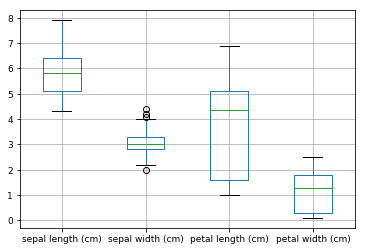

In [16]:
boxplots = iris_dataframe.boxplot(fontsize=9)

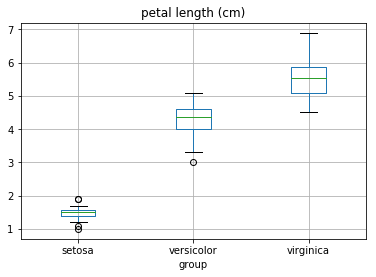

In [17]:
import matplotlib.pyplot as plt
boxplots = iris_dataframe.boxplot(column='petal length (cm)', 
                                  by='group', fontsize=10)
plt.suptitle("")
plt.show()

## Performing t-tests after boxplots

In [18]:
from scipy.stats import ttest_ind

group0 = iris_dataframe['group'] == 'setosa'
group1 = iris_dataframe['group'] == 'versicolor'
group2 = iris_dataframe['group'] == 'virginica'
variable = iris_dataframe['petal length (cm)']

print('var1 %0.3f var2 %03f' % (variable[group1].var(), 
                                variable[group2].var()))

var1 0.221 var2 0.304588


In [19]:
variable = iris_dataframe['sepal width (cm)']
t, pvalue = ttest_ind(variable[group1], variable[group2],
                      axis=0, equal_var=False)
print('t statistic %0.3f p-value %0.3f' % (t, pvalue))

t statistic -3.206 p-value 0.002


In [20]:
from scipy.stats import f_oneway
variable = iris_dataframe['sepal width (cm)']
f, pvalue = f_oneway(variable[group0], 
                     variable[group1], 
                     variable[group2])
print('One-way ANOVA F-value %0.3f p-value %0.3f' 
      % (f,pvalue))

One-way ANOVA F-value 47.364 p-value 0.000


## Observing parallel coordinates

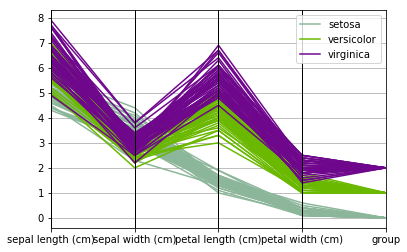

In [21]:
from pandas.plotting import parallel_coordinates
iris_dataframe['group'] = iris.target
iris_dataframe['labels'] = [iris.target_names[k] 
                    for k in iris_dataframe['group']]
pll = parallel_coordinates(iris_dataframe, 'labels')

## Graphing distributions

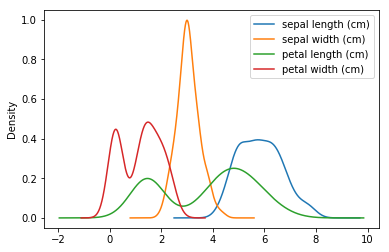

In [22]:
cols = iris_dataframe.columns[:4]
densityplot = iris_dataframe[cols].plot(kind='density')

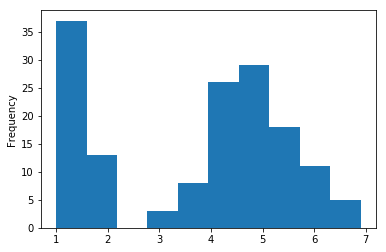

In [23]:
variable = iris_dataframe['petal length (cm)']
single_distribution = variable.plot(kind='hist')

## Plotting scatterplots

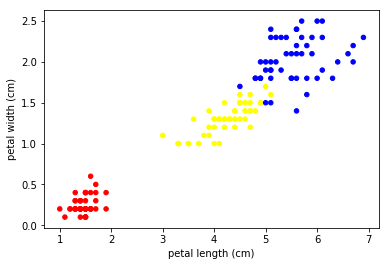

In [24]:
palette = {0: 'red', 1: 'yellow', 2:'blue'}
colors = [palette[c] for c in iris_dataframe['group']]
simple_scatterplot = iris_dataframe.plot(
                kind='scatter', x='petal length (cm)', 
                y='petal width (cm)', c=colors)

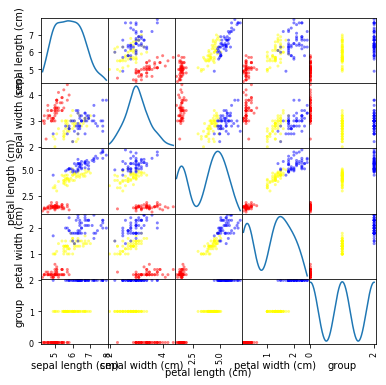

In [25]:
from pandas.plotting import scatter_matrix
palette = {0: "red", 1: "yellow", 2: "blue"}
colors = [palette[c] for c in iris_dataframe['group']]
matrix_of_scatterplots = scatter_matrix(
    iris_dataframe, figsize=(6, 6), 
    color=colors, diagonal='kde')

# Understanding Correlation

## Using covariance and correlation

In [26]:
iris_dataframe.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),0.685694,-0.039268,1.273682,0.516904,0.530872
sepal width (cm),-0.039268,0.188004,-0.321713,-0.117981,-0.148993
petal length (cm),1.273682,-0.321713,3.113179,1.296387,1.371812
petal width (cm),0.516904,-0.117981,1.296387,0.582414,0.597987
group,0.530872,-0.148993,1.371812,0.597987,0.671141


In [27]:
iris_dataframe.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
group,0.782561,-0.419446,0.949043,0.956464,1.000000


In [28]:
covariance_matrix = np.cov(iris_nparray, rowvar=0)
correlation_matrix = np.corrcoef(iris_nparray, rowvar=0)

## Using nonparametric correlation

In [29]:
from scipy.stats import spearmanr
from scipy.stats.stats import pearsonr
a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']
rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)
print('Pearson r %0.3f | Spearman rho %0.3f' 
      % (r_coef, rho_coef))

Pearson r -0.109 | Spearman rho -0.159


## Considering chi-square for tables

In [30]:
from scipy.stats import chi2_contingency
table = pd.crosstab(iris_dataframe['group'], 
                    iris_binned['petal length (cm)'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square %0.2f p-value %0.3f' % (chi2, p))

Chi-square 212.43 p-value 0.000


# Modifying Data Distribution

## Creating a Z-score standardization

In [31]:
from sklearn.preprocessing import scale
variable = iris_dataframe['sepal width (cm)']
stand_sepal_width = scale(variable)

## Transforming other notable distributions

In [32]:
from scipy.stats.stats import pearsonr
tranformations = {'x': lambda x: x, 
                  '1/x': lambda x: 1/x, 
                  'x**2': lambda x: x**2, 
                  'x**3': lambda x: x**3, 
                  'log(x)': lambda x: np.log(x)}
a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']
for transformation in tranformations:
    b_transformed =  tranformations[transformation](b)
    pearsonr_coef, pearsonr_p = pearsonr(a, b_transformed)
    print('Transformation: %s \t Pearson\'s r: %0.3f' 
          % (transformation, pearsonr_coef))

Transformation: x 	 Pearson's r: -0.109
Transformation: 1/x 	 Pearson's r: 0.073
Transformation: x**2 	 Pearson's r: -0.122
Transformation: x**3 	 Pearson's r: -0.131
Transformation: log(x) 	 Pearson's r: -0.093
